Note: I used data from [boston police districts](https://www.kaggle.com/christotk/boston-police-districts) in order to process with <i>geopandas</i>

<h3>Import libraries and load data</h3>

In [1]:
import pandas as pd # data processing
import geopandas as gpd # geospatial data processing
import numpy as np # linear algebra
import folium # mapping
from folium.plugins import HeatMap
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
%matplotlib inline

# read crimes file
crimes = pd.read_csv('../input/crimes-in-boston/crime.csv', encoding = 'latin')

# read Police Districts shapefile with geopandas
gdf = gpd.read_file('../input/boston-police-districts/police_districts/Police_Districts.shp')

<h3>Explore the datasets</h3>

In [2]:
gdf

,OBJECTID,DISTRICT,ID,BPDGIS_GIS,DISTRICT_,DISTRICT__,ShapeSTAre,ShapeSTLen,geometry
0,1,A15,A15,A,15,15,3.798284e+07,57556.859964,(POLYGON ((-71.07415718153364 42.3905076862483...
1,2,A7,A7,A,7,07,1.401151e+08,138468.216080,(POLYGON ((-70.99644430907341 42.3955679826137...
2,3,A1,A1,A,1,01,4.445582e+07,49080.786370,POLYGON ((-71.05199523849357 42.36883599550553...
3,4,C6,C6,C,6,06,1.237108e+08,93582.798497,POLYGON ((-71.04405776717314 42.35403006334784...
4,5,D4,D4,D,4,04,7.000553e+07,41040.347429,"POLYGON ((-71.07416484856725 42.3572379188053,..."
5,6,D14,D14,D,14,14,1.236253e+08,58025.031627,POLYGON ((-71.12572868157875 42.36997517644028...
6,7,E13,E13,E,13,13,1.119417e+08,66503.441590,POLYGON ((-71.11188991763413 42.33192659197719...
7,8,E5,E5,E,5,05,1.910675e+08,87149.325855,POLYGON ((-71.15231506675978 42.29471321581429...
8,9,B3,B3,B,3,03,9.315668e+07,60469.578556,POLYGON ((-71.08021903099828 42.30466226227246...
9,10,C11,C11,C,11,11,1.329178e+08,120971.401681,(POLYGON ((-71.06490720777546 42.3168612863363...


In [3]:
crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
crimes.shape

(319073, 17)

In [5]:
crimes.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


check if we have missing data

In [6]:
crimes.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

<h3>Plot spatial data</h3>

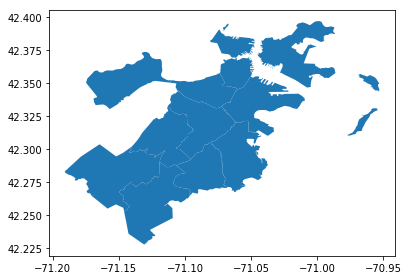

In [7]:
gdf.plot()
plt.tight_layout()

geopandas plots data from geometry column.

we need to label each polygon/district. To do so we have to define a point within each polygon

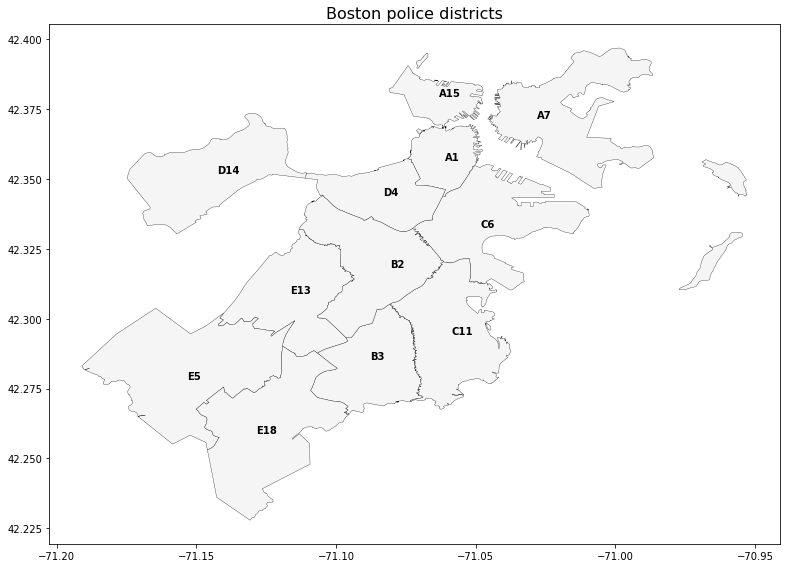

In [8]:
gdf['point'] = gdf.representative_point() # this is a point guaranteed to be within each polygon

# label_points - a GeoDataFrame used for labeling
label_points = gdf.copy()
label_points.set_geometry('point', inplace = True)

# plot districts
ax = gdf.plot(color = 'whitesmoke', figsize = (12,8), edgecolor = 'black', linewidth = 0.3)

def add_label():
    # add label for each polygon
    for x, y, label in zip(label_points.geometry.x, label_points.geometry.y, label_points['DISTRICT']):
        plt.text(x, y, label, fontsize = 10, fontweight = 'bold')

add_label()
plt.title('Boston police districts', fontsize = 16)
plt.tight_layout()

<h3>Analysis</h3>

* What types of crimes are the most common?

In [9]:
most_common_crimes = pd.DataFrame({'Count': crimes.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending = False).head(10)}) # top 10 most common crimes
most_common_crimes

,Count
Motor Vehicle Accident Response,37132
Larceny,25935
Medical Assistance,23540
Investigate Person,18750
Other,18075
Drug Violation,16548
Simple Assault,15826
Vandalism,15415
Verbal Disputes,13099
Towed,11287


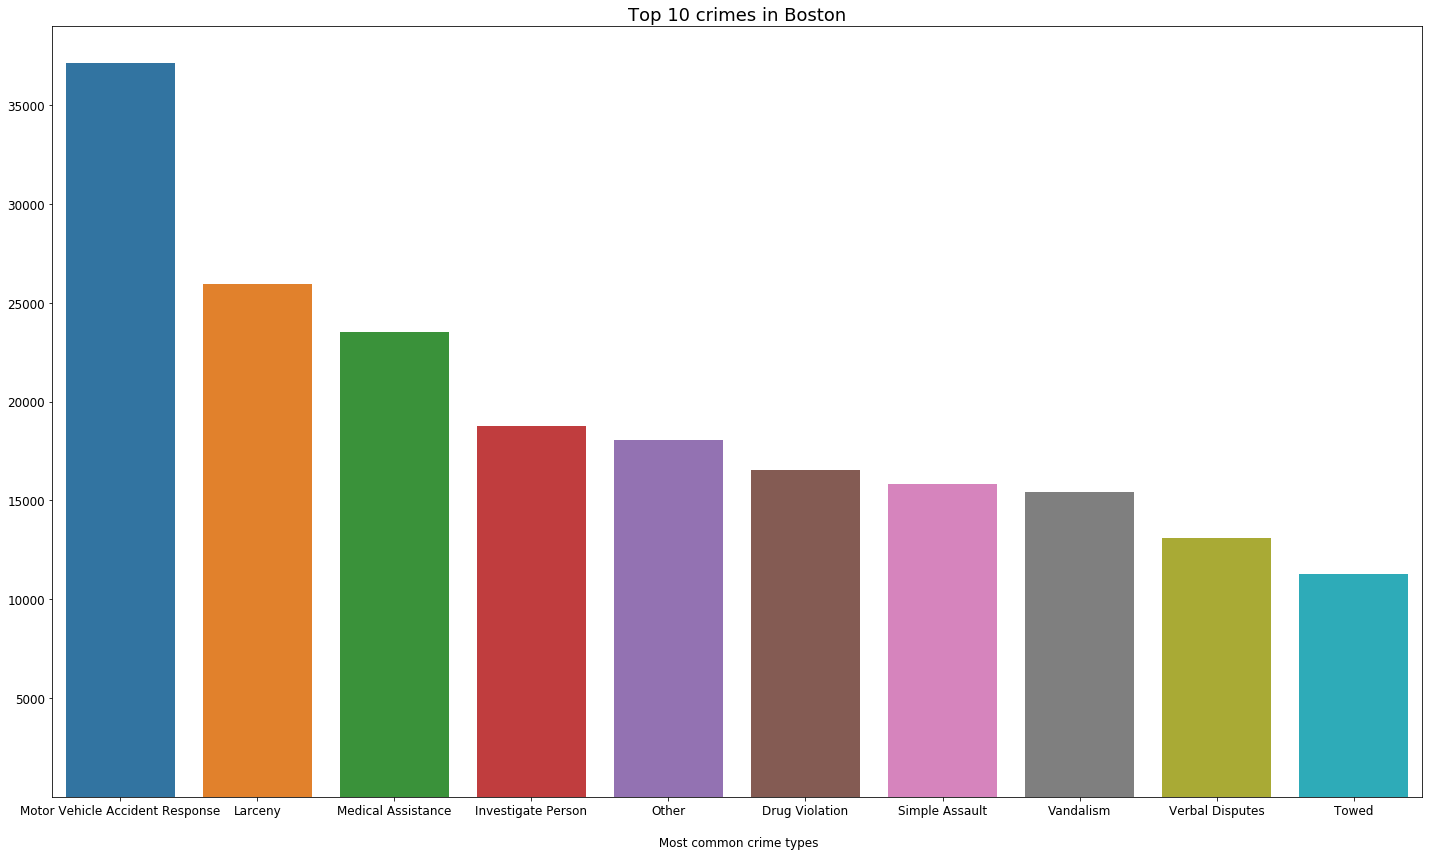

In [10]:
plt.figure(figsize = (20,12))
sns.barplot(x = most_common_crimes.index, y = 'Count', data = most_common_crimes)
plt.yticks((np.arange(5000, most_common_crimes['Count'].max(), 5000)))
plt.ylabel(None)
plt.tick_params(labelsize = 12)
plt.xlabel('\n Most common crime types', fontsize = 12)
plt.title('Top 10 crimes in Boston', fontsize = 18)
plt.tight_layout()

* How is crime distributed in boston area? (most_common_crimes)

folium HeatMap seems useful in this case

In [11]:
location_of_most_common_crimes = crimes[crimes.OFFENSE_CODE_GROUP.isin(most_common_crimes.index)].loc[:, ['Lat', 'Long']].dropna()

my_map=folium.Map(location = [42.320,-71.05], #Initiate map on Boston city
                  zoom_start = 11,
                  min_zoom = 11
)

HeatMap(data=location_of_most_common_crimes.sample(10000), radius=16).add_to(my_map)

my_map

* How are crimes distributed amongst the districts?

In [12]:
districts = pd.DataFrame({'Count': crimes.DISTRICT.value_counts().sort_values(ascending = False)})
districts

,Count
B2,49945
C11,42530
D4,41915
A1,35717
B3,35442
C6,23460
D14,20127
E13,17536
E18,17348
A7,13544


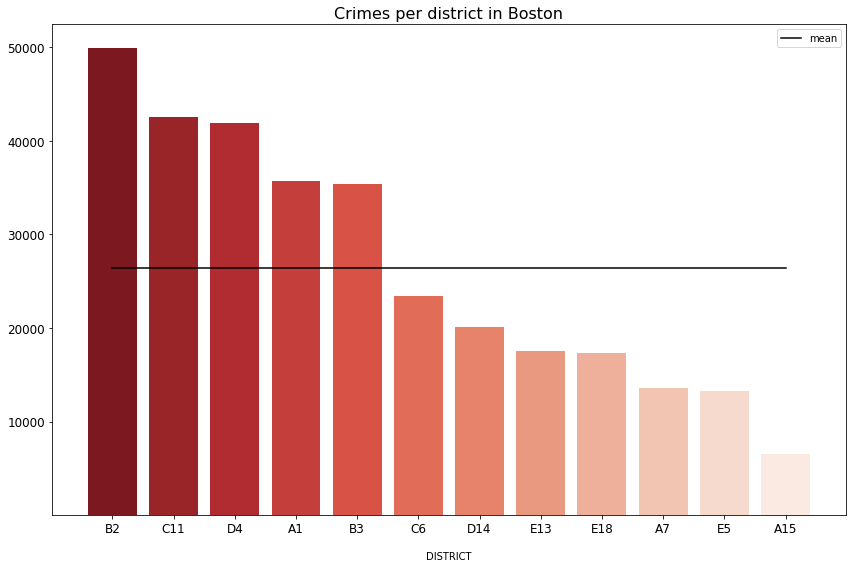

In [13]:
plt.figure(figsize = (12,8))
sns.barplot(x = districts.index, y = 'Count', data = districts, palette = 'Reds_r')
sns.lineplot(x = districts.index, y = districts['Count'].mean(), data = districts, label = 'mean', color = 'black') # plot mean value
plt.title('Crimes per district in Boston', fontsize = 16)
plt.ylabel(None)
plt.xlabel('\nDISTRICT')
plt.yticks(np.arange(10000, 55000, 10000))
plt.tick_params(labelsize = 12)
plt.tight_layout()

B2, C11, D4, A1, B3 have the highest crime rates.
(Note that there are 1765 NaN values in DISTRICT column...)

Let's visualize this with geopandas. 

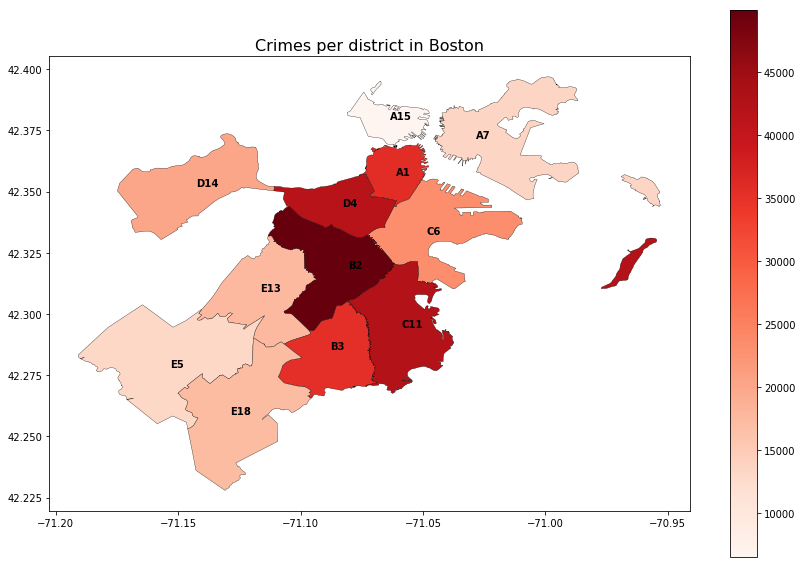

In [14]:
gdf['crimes'] = gdf.DISTRICT.map(districts['Count']) # use map function to match each district with its corresponding value
ax = gdf.plot(column = gdf.crimes, cmap = 'Reds', legend = True, edgecolor = 'black', linewidth = 0.3, figsize = (12,8))
add_label()
plt.title('Crimes per district in Boston', fontsize = 16)
plt.tight_layout()

* What time during the day most crimes are being reported?

In [15]:
crimes_per_hour = pd.DataFrame({'Count': crimes['HOUR'].value_counts().sort_index()})
crimes_per_hour

,Count
0,15106
1,9269
2,7693
3,4589
4,3408
5,3311
6,5026
7,8850
8,13043
9,14740


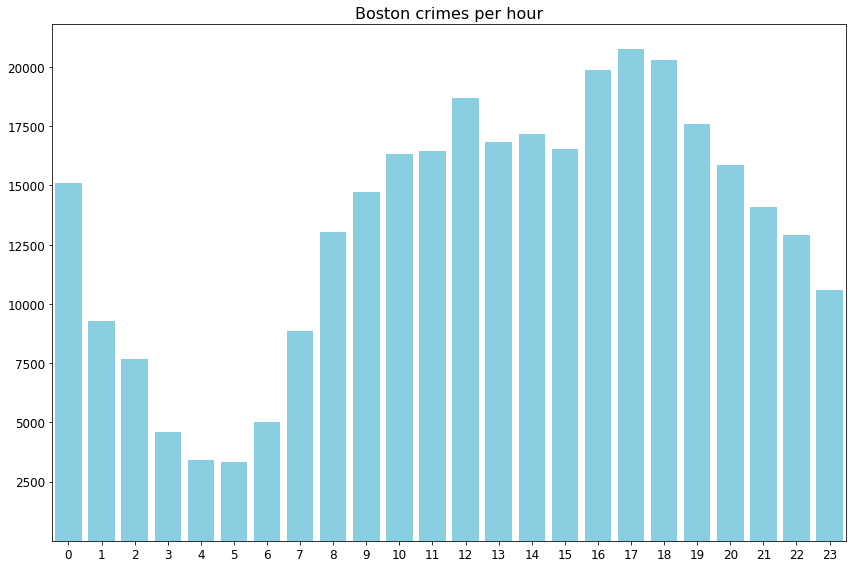

In [16]:
plt.figure(figsize = (12,8))
sns.barplot(x = crimes_per_hour.index, y = crimes_per_hour['Count'], data = crimes_per_hour, color = '#7AD7F0')
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(np.arange(2500, 22000, 2500))
plt.tick_params(labelsize = 12)
plt.title('Boston crimes per hour', fontsize = 16)
plt.tight_layout()

The majority of crimes are being reported between 4PM and 7PM and the minority between 2AM and 6AM

* How are crimes distributed during weeks?

In [17]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes_per_day = pd.DataFrame({'Count': crimes['DAY_OF_WEEK'].value_counts().loc[labels]})
crimes_per_day

,Count
Monday,45679
Tuesday,46383
Wednesday,46729
Thursday,46656
Friday,48495
Saturday,44818
Sunday,40313


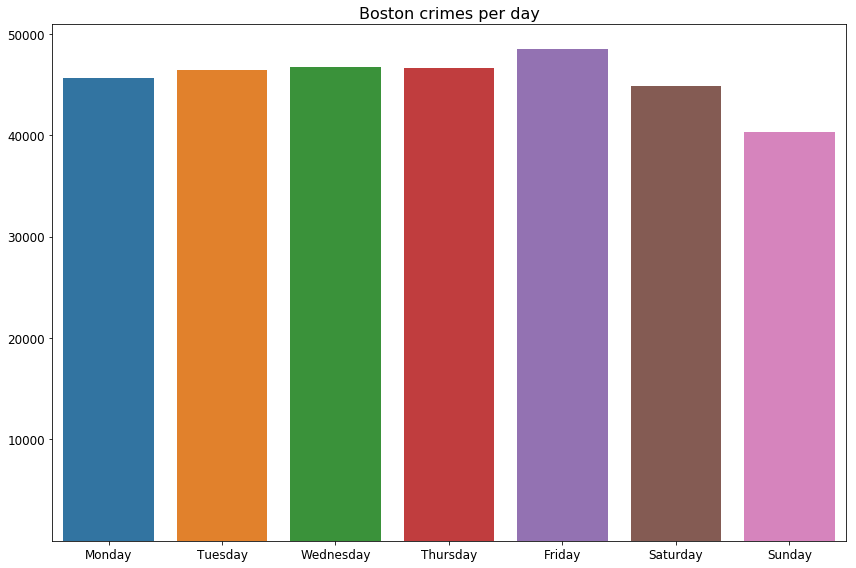

In [18]:
plt.figure(figsize = (12,8))
sns.barplot(x = crimes_per_day.index, y = 'Count', data = crimes_per_day)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(np.arange(10000, 55000, 10000))
plt.tick_params(labelsize = 12)
plt.title('Boston crimes per day', fontsize = 16)
plt.tight_layout()

peak on Friday and through on Sunday

* How many crimes per month/year?

As shown below, this dataset contains crimes reported between 06/2015 and 09/2018. Therefore, for this question I will use data collected in 2016 and 2017.

In [19]:
print(crimes.OCCURRED_ON_DATE.min())
print(crimes.OCCURRED_ON_DATE.max())

2015-06-15 00:00:00
2018-09-03 21:25:00


In [20]:
crimes_2016_2017 = crimes[crimes['YEAR'].isin(['2016', '2017'])]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
crimes_per_month = pd.DataFrame({'Count': crimes_2016_2017['MONTH'].value_counts().sort_index().values}, index = months)
crimes_per_month

,Count
January,15828
February,14716
March,16378
April,16170
May,17293
June,17543
July,17694
August,18144
September,17462
October,17429


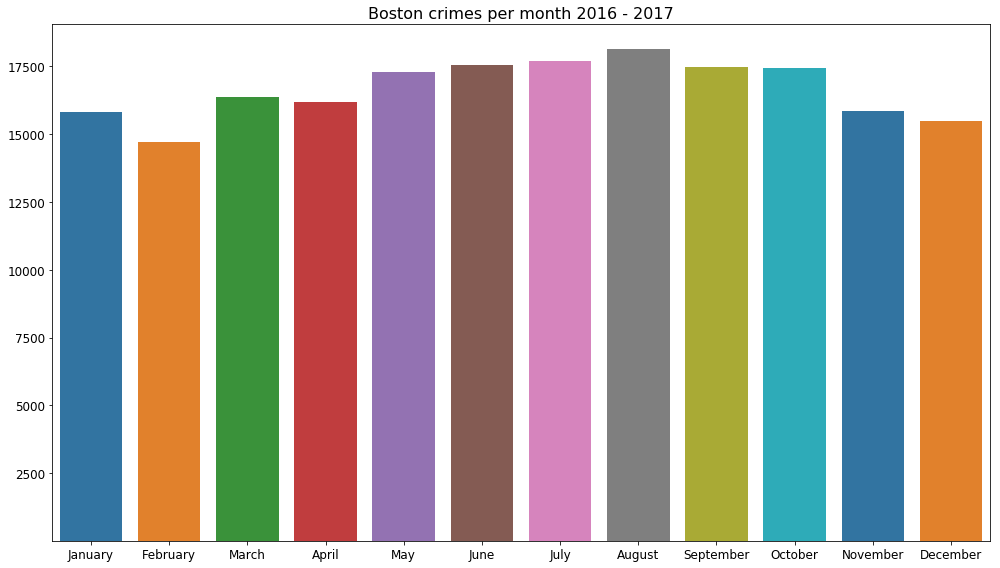

In [21]:
plt.figure(figsize = (14, 8))
sns.barplot(x = crimes_per_month.index, y = 'Count', data = crimes_per_month, palette = 'tab10')
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(np.arange(2500, 20000, 2500))
plt.tick_params(labelsize = 12)
plt.title('Boston crimes per month 2016 - 2017', fontsize = 16)
plt.tight_layout()

more crimes in summer compared to winter

In [22]:
crimes_per_year = pd.DataFrame({'Count': crimes_2016_2017['YEAR'].value_counts().sort_index()})
crimes_per_year

,Count
2016,99114
2017,100886


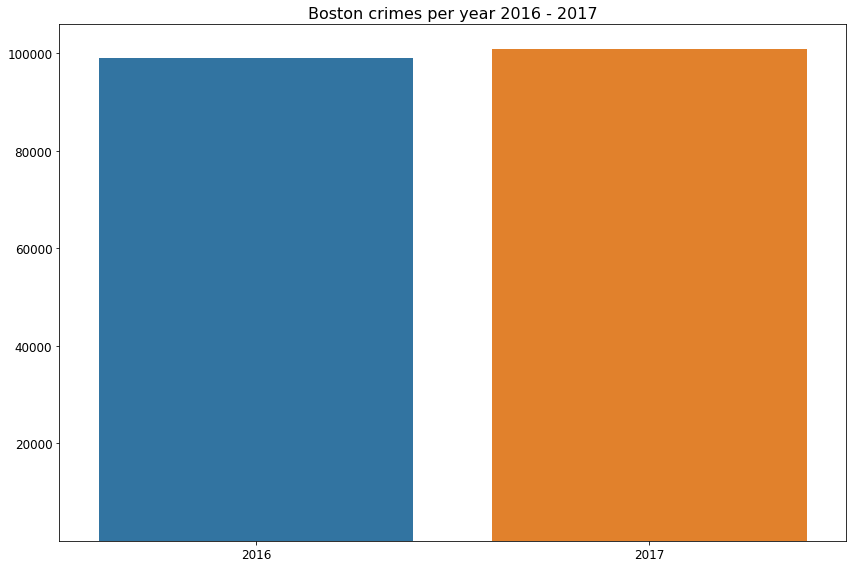

In [23]:
plt.figure(figsize = (12, 8))
sns.barplot(x = crimes_per_year.index, y = 'Count', data = crimes_per_year)
plt.ylabel(None)
plt.tick_params(labelsize = 12)
plt.yticks(np.arange(20000, 120000, 20000))
plt.title('Boston crimes per year 2016 - 2017', fontsize = 16)
plt.tight_layout()

In [24]:
crimes_per_year['population'] = [678430, 685094] # Boston population for 2016 and 2017

In [25]:
(crimes_per_year.loc[2017].Count-crimes_per_year.loc[2016].Count)/crimes_per_year.loc[2016].Count

0.017878402647456465

In [26]:
(crimes_per_year.loc[2017].population-crimes_per_year.loc[2016].population)/crimes_per_year.loc[2016].population

0.009822678832009197

population and crime rate increased by 1% and 1,8% respectively from 2016 to 2017.

**This was my first kernel. Thank you for reviewing. Please feel free to comment or advise.**